<a href="https://colab.research.google.com/github/BernardoRicci/Python/blob/main/CLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import random as r
import math as m
import matplotlib.pyplot as plt
import numpy as np

The players are p1, p2, p3. We assume p1 has p2/p3 on their left/right; so p2 has p3/p1 on their left/right, and p3 has p1/p2 on their left/right.

The next two dictionaries track players on the left/right of a given player.

In [51]:
left_ps = {'p1': 'p2', 'p2': 'p3', 'p3': 'p1'}
right_ps = {'p1': 'p3', 'p2': 'p1', 'p3': 'p2'}

- `CLR_roll`: fair, single die roll for the CLR game

- `roll_dice`: determine how many dice to roll depending on how many coins the player has left and then roll them

In [52]:
def CLR_roll():
    return r.choice(('C','L','R',0,0,0))

def roll_dice(coins):
    dice = []
    if coins == 0:
        pass
    elif coins == 1:
        dice.append(CLR_roll())
    elif coins == 2:
        dice.append(CLR_roll())
        dice.append(CLR_roll())
    else:
        dice.append(CLR_roll())
        dice.append(CLR_roll())
        dice.append(CLR_roll())
        
    return dice


Simulate an event of rolling dice

In [7]:
def process_dice(dice, coin_count, player):
    for d in dice:
        if d == 'C':
            coin_count['center'] += 1
        if d == 'L':
            coin_count[left_ps[player]] += 1
        if d == 'R':
            coin_count[right_ps[player]] += 1
        if d != 0:
            coin_count[player] -= 1


Conditio to win



In [41]:
def check_for_winner(winner, coin_count):
    p_status = list(coin_count.values())
    p_status.remove(coin_count['center'])
    if p_status.count(0) == 2:
        p_status.remove(0)
        p_status.remove(0)
        winner_coins = p_status[0]
        for key,val in coin_count.items():
             if val == winner_coins:
                winner = key
    return winner

Let's start our game

In [76]:
N=0
Total_games=int(10e5)
Tot_rounds=[]

while N<Total_games:
  coin_count={'center': 0, 'p1': 10, 'p2': 10, 'p3': 10}

  winner = None
  rounds=0

  while(winner==None):
      rounds+=1
      for player in ['p1', 'p2', 'p3']:
        dice=roll_dice(coin_count[player])
        process_dice(dice, coin_count, player)
        winner = check_for_winner(winner, coin_count)
        if winner:
          break
  N+=1
  Tot_rounds.append(rounds)


# Plot Distribution

*   ```n```: is the number of counts in each bin of the histogram
*   ```bins```: is the left hand edge of each bin
*   ```patches```: is the individual patches used to create the histogram, e.g a collection of rectangles.

Patches can be used to change the properties of individual bars e.g

```
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(size=100)
n, bins, patches = plt.hist(x)

plt.setp(patches[0], 'facecolor', 'g')
plt.show()
```

In general the ```n``` and ```bins``` are used for subsequent data analysis e.g



```
"""
Make a histogram of normally distributed random numbers and plot the
analytic PDF over it
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data
n, bins, patches = ax.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be 50 probability
# density values in n, 51 bin edges in bins and 50 patches.  To get
# everything lined up, we'll compute the bin centers
bincenters = 0.5*(bins[1:]+bins[:-1])
# add a 'best fit' line for the normal PDF
y = mlab.normpdf( bincenters, mu, sigma)
l = ax.plot(bincenters, y, 'r--', linewidth=1)

ax.set_xlabel('Smarts')
ax.set_ylabel('Probability')
#ax.set_title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
ax.set_xlim(40, 160)
ax.set_ylim(0, 0.03)
ax.grid(True)

plt.show()
```





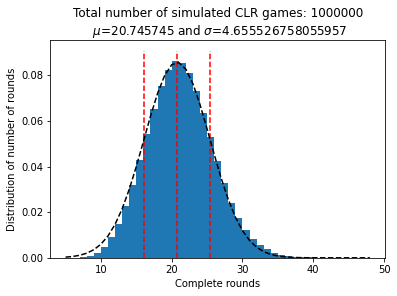

In [83]:
plt.xlabel("Complete rounds")
plt.ylabel("Distribution of number of rounds")
n, bins, patches= plt.hist(Tot_rounds, bins=max(Tot_rounds)-min(Tot_rounds), density=True)

mu=np.mean(Tot_rounds)
sigma=np.std(Tot_rounds)
norm = (1 / (m.sqrt(2 * m.pi) * sigma))
sigma_inv = 1 / sigma

plt.title("Total number of simulated CLR games: {0}\n $\mu$={1} and $\sigma$={2}".format(Total_games, mu, sigma))

y = []
for b in bins:
    y.append(norm * m.exp(-0.5 * (sigma_inv * (b - mu))**2))

plt.title("Total number of simulated CLR games: {0}\n $\mu$={1} and $\sigma$={2}".format(Total_games, mu, sigma))

plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

plt.vlines(mu, 0, 1.05*max(n), ls='--', color='red')
plt.vlines(mu-sigma, 0, 1.05*max(n), ls='--', color='red')
plt.vlines(mu+sigma, 0, 1.05*max(n), ls='--', color='red')

Its semilog version

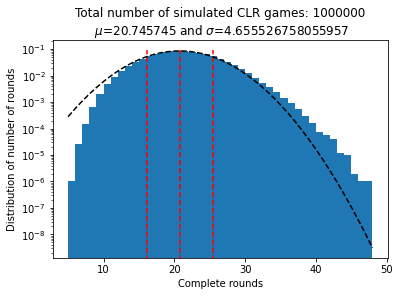

In [88]:
plt.xlabel("Complete rounds")
plt.ylabel("Distribution of number of rounds")
n, bins, patches = plt.hist(Tot_rounds, bins=max(Tot_rounds)-min(Tot_rounds), density=True, log=True)

mu=np.mean(Tot_rounds)
sigma=np.std(Tot_rounds)
norm = (1 / (m.sqrt(2 * m.pi) * sigma))
sigma_inv = 1 / sigma

y = []
for b in bins:
    y.append(norm * m.exp(-0.5 * (sigma_inv * (b - mu))**2))

plt.title("Total number of simulated CLR games: {0}\n $\mu$={1} and $\sigma$={2}".format(Total_games, mu, sigma))

plt.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

plt.vlines(mu, 0, 1.05*max(n), ls='--', color='red')
plt.vlines(mu-sigma, 0, 1.05*max(n), ls='--', color='red')
plt.vlines(mu+sigma, 0, 1.05*max(n), ls='--', color='red')

Cumulative distribution

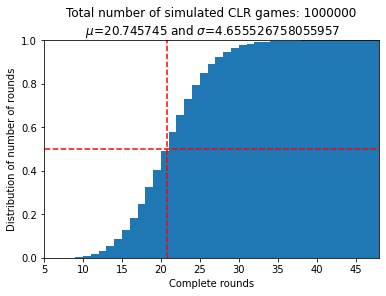

In [89]:
plt.xlabel("Complete rounds")
plt.ylabel("Distribution of number of rounds")
plt.title("Total number of simulated CLR games: {0}\n $\mu$={1} and $\sigma$={2}".format(Total_games, mu, sigma))

n, bins, patches = plt.hist(Tot_rounds, bins=max(Tot_rounds)-min(Tot_rounds), density=True, log=False, cumulative=True)

plt.xlim(min(Tot_rounds), max(Tot_rounds))
plt.ylim(0, 1)
plt.vlines(mu, 0, 1, ls='--', color='red')
plt.hlines(0.5, 0, max(Tot_rounds), ls='--', color='red')